In [13]:
from sklearn.datasets import make_regression as mr
import matplotlib.pyplot as plt
import numpy as np
import requests as req
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split



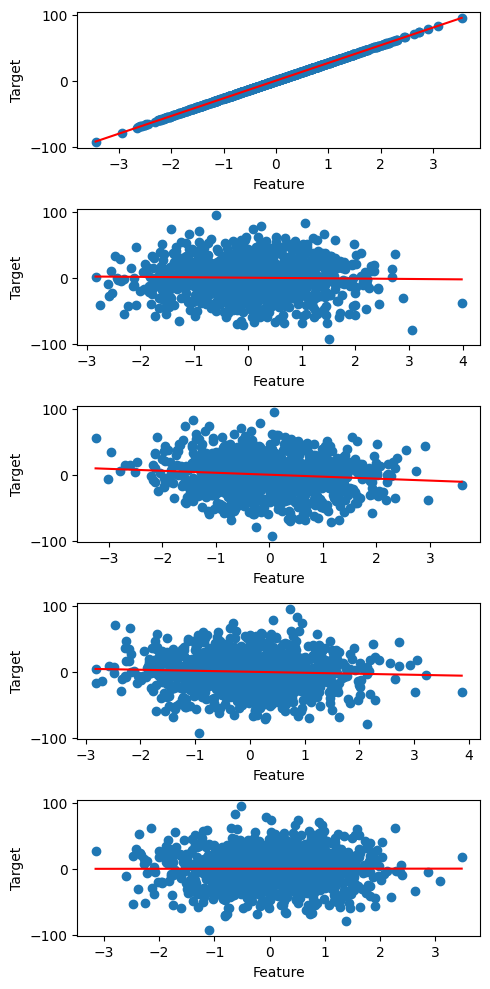

In [14]:
## Question 1

x,y = mr(n_samples = 1000, n_features = 5, n_informative=1)

fig, axes = plt.subplots(5,1, figsize=(5,10))

for i in range(5):
    axes[i].scatter(x[:, i], y)
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Target')
    
    slope, intercept = np.polyfit(x[:, i], y, 1)

    x_line = np.linspace(np.min(x[:, i]), np.max(x[:, i]), 100)
    y_line = slope * x_line + intercept

    axes[i].plot(x_line, y_line, color='red')

plt.tight_layout()
plt.show()

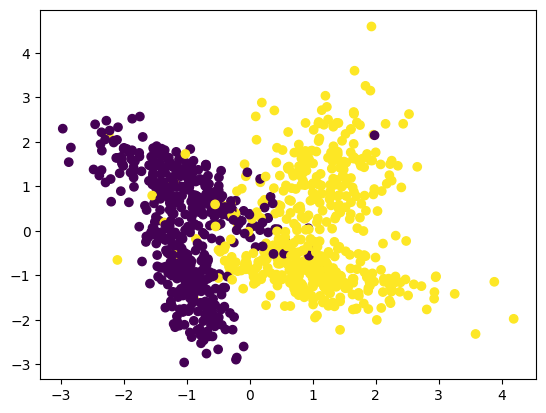

In [15]:
## Question 2
x,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

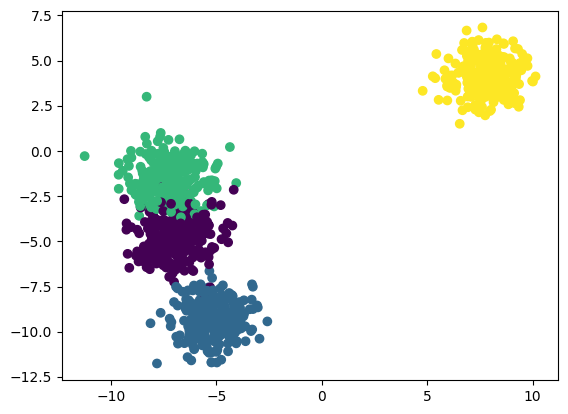

In [16]:
## Question 3
x,y = mb(n_samples=1000, centers=4, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y) 
plt.show()

In [17]:
## Question 4

#table tr-> headers has th and rows has td tags

page = page = req.get('https://www.worldometers.info/coronavirus/')
soup = BeautifulSoup(page.text, 'lxml')

table = soup.find('table', class_='table table-bordered table-hover main_table_countries')

headers = []
for i in table.find_all('th'):
    title = i.text
    headers.append(title)

rows = table.find_all('tr')
DataFrame = pd.DataFrame(columns=headers)

for i in rows[1:]:
    data = i.find_all("td")
    row = [tr.text for tr in data]
    l = len(DataFrame)
    DataFrame.loc[l] = row

DataFrame.rename(columns={'Country,Other': 'Country'}, inplace=True)

DataFrame_final = DataFrame.loc[:,('Country','Population', 'Continent', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases')]
DataFrame_final

,Country,Population,Continent,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,\nNorth America\n,,North America,"126,649,484",+125,"1,632,558",+8,"122,498,724","+1,197","2,518,202"
1,\nAsia\n,,Asia,"217,322,003","+21,394","1,546,302",+15,"201,037,464","+18,437","14,738,237"
2,\nEurope\n,,Europe,"249,252,989",,"2,059,646",,"245,207,160","+7,736","1,986,183"
3,\nSouth America\n,,South America,"68,674,162",,"1,355,584",,"66,460,570",+47,"858,008"
4,\nOceania\n,,Australia/Oceania,"14,323,648",,"27,858",,"14,150,432",,"145,358"
...,...,...,...,...,...,...,...,...,...,...
242,Total:,,South America,"68,674,162",,"1,355,584",,"66,460,570",,"858,008"
243,Total:,,Australia/Oceania,"14,323,648",,"27,858",,"14,150,432",,"145,358"
244,Total:,,Africa,"12,823,265",,"258,762",,"12,085,254",,"479,249"
245,Total:,,,721,,15,,706,,0


Counter({0: 9500, 1: 500})


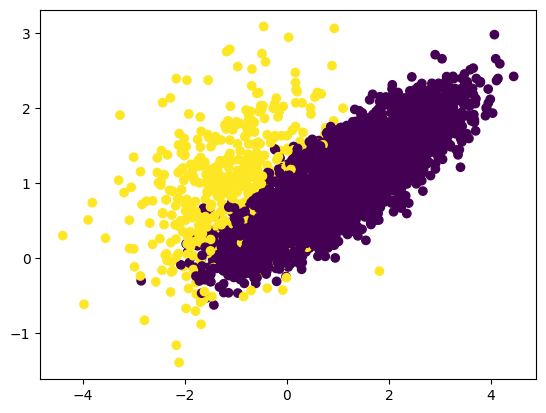

Counter({0: 7497, 1: 2499})


In [18]:
### Question 5
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_classes=2,
n_clusters_per_class=1, weights=[0.95], flip_y=0, random_state=1)
counter = Counter(y)
print(counter)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

over = SMOTE(sampling_strategy=0.26315789473)
under = RandomUnderSampler(sampling_strategy=0.333333)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)
counter = Counter(y)
print(counter)

In [19]:
## Question 6

iris = load_iris()

X = iris.data
y = iris.target

DataFrame = pd.DataFrame(X)
print(DataFrame.head())
print(DataFrame.isna().sum())
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
print("Training shape:", Xtrain.shape, ytrain.shape)
print("Testing shape:", Xtest.shape, ytest.shape)

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
0    0
1    0
2    0
3    0
dtype: int64
Training shape: (120, 4) (120,)
Testing shape: (30, 4) (30,)
